# Brain Tumor Detection
Binary Classification: CNN to classigy into Y or N 
Feature Extraction & Clustering: NN to extract features from MRI scans and then apply algorithms to find patterns

Import Libraries and Data

In [1]:
!pip install numpy tensorflow opencv-python matplotlib
!pip install numpy requests Pillow


In [2]:
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt
import random
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from sklearn.model_selection import train_test_split
import os
import requests
from PIL import Image
from io import BytesIO
import numpy as np

def load_images_from_urls(urls):
    images = []
    for url in urls:
        response = requests.get(url)
        image = Image.open(BytesIO(response.content))
        image = image.resize((128, 128))  # Resize as needed
        image = np.array(image)
        images.append(image)
    #return np.array(images) 


image_urls = [
    
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/1%20no.jpeg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/10%20no.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/11%20no.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/12%20no.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/13%20no.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/14%20no.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/15%20no.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/17%20no.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/18%20no.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/19%20no.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/20%20no.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/21%20no.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/22%20no.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/23%20no.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/24%20no.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/25%20no.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/26%20no.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/27%20no.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/28%20no.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/29%20no.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/3%20no.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/30%20no.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/31%20no.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/32%20no.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/33%20no.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/34%20no.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/35%20no.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/36%20no.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/37%20no.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/38%20no.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/39%20no.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/4%20no.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/41%20no.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/42%20no.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/43%20no.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/44no.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/45%20no.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/46%20no.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/47%20no.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/48%20no.jpeg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/49%20no.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/5%20no.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/50%20no.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/6%20no.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/7%20no.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/8%20no.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/9%20no.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/N1.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/N1.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/N11.jpg' ,
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/N15.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/N16.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/N17.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/N19.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/N20.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/N2.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/N21.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/N22.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/N26.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/N3.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/N5.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/N6.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/No11.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/No12.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/No13.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/No14.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/No15.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/No16.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/No17.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/No18.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/No19.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/No20.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/No21.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/No22.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/no%201.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/no%2010.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/no%20100.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/no%202.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/no%203.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/no%204.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/no%205.jpeg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/no%206.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/no%207.jpeg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/no%208.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/no%2089.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/no%209.png',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/no%2090.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/no%2091.jpeg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/no%2092.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/no%20923.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/no%2094.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/no%2095.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/no%2096.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/no%2097.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/no%2098.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/no%2099.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/no.jpg',
    
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y1.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y10.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y100.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y101.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y102.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y103.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y104.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y105.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y106.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y107.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y108.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y109.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y11.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y111.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y112.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y113.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y114.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y115.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y116.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y117.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y12.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y120.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y13.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y14.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y146.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y147.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y148.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y15.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y153.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y154.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y155.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y156.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y157.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y158.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y159.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y16.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y160.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y161.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y162.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y163.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y164.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y165.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y166.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y167.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y168.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y169.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y17.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y170.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y18.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y180.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y181.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y182.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y183.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y184.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y185.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y186.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y187.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y188.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y19.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y192.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y193.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y194.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y195.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y2.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y20.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y21.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y22.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y23.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y24.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y242.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y243.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y244.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y245.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y246.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y247.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y248.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y249.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y25.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y250.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y251.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y252.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y253.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y254.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y255.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y256.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y257.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y258.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y259.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y26.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y27.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y28.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y29.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y3.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y30.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y31.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y32.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y33.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y34.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y35.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y36.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y37.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y38.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y39.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y4.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y40.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y41.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y42.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y44.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y45.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y46.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y47.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y49.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y50.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y51.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y52.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y53.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y54.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y55.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y56.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y58.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y59.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y6.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y60.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y61.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y62.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y65.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y66.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y67.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y69.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y7.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y70.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y71.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y73.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y74.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y75.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y76.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y77.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y78.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y79.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y8.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y81.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y82.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y85.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y86.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y89.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y9.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y90.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y91.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y92.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y92.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y95.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y96.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y97.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y98.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y99.JPG',
    
]

labels = [url.split('/')[-2] for url in image_urls]  
loaded_images = load_images_from_urls(image_urls)

2024-04-27 19:18:31.161251: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-27 19:18:31.162083: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-27 19:18:31.947127: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-27 19:18:34.228397: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-27 19:18:37.749127: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF

Data Processing

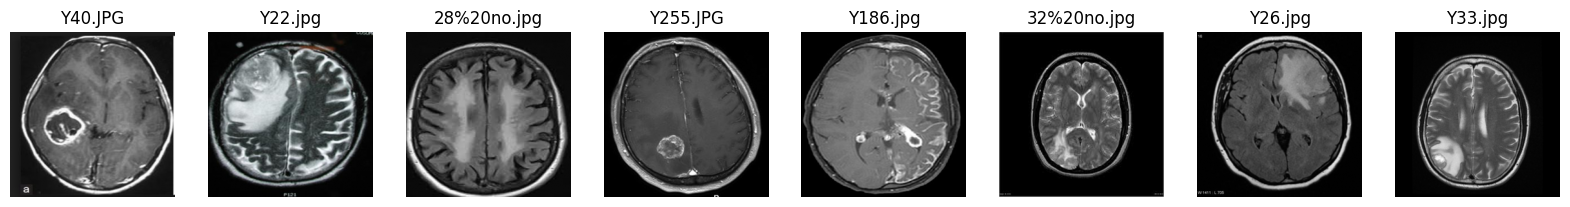

In [3]:
import requests
from PIL import Image
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt
import random

def load_and_preprocess_image(url, resize_shape=(256, 256), normalize=False):
    try:
        response = requests.get(url)
        response.raise_for_status()  
        image_bytes = BytesIO(response.content)
        image = Image.open(image_bytes).convert('RGB')  
        
        # Resize image
        image = image.resize(resize_shape)
        
        if normalize:
            image_array = np.array(image) / 255.0  
        else:
            image_array = np.array(image)
        
        return image_array, url.split('/')[-1] 
    except requests.HTTPError as e:
        print(f"Failed to retrieve {url}: {str(e)}")
        return None, None


image_data = [load_and_preprocess_image(url, normalize=True) for url in image_urls]
images, titles = zip(*[(img, title) for img, title in image_data if img is not None])

def display_images(image_arrays, titles):
    num_images = len(image_arrays)
    if num_images == 0:
        print("No images to display.")
        return
    num_display = min(num_images, 8)  
    selected_indices = random.sample(range(num_images), num_display)
    selected_images = [image_arrays[i] for i in selected_indices]
    selected_titles = [titles[i] for i in selected_indices]

    fig, axs = plt.subplots(1, num_display, figsize=(20, 5))  
    for ax, img, title in zip(axs, selected_images, selected_titles):
        ax.imshow(img)
        ax.set_title(title)
        ax.axis('off')
    plt.show()


display_images(images, titles)


One-Hot Encoding

Split Data

Train the Model

Evaluate